In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = 'dark')

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Objective:
The objective is to predict stroke by using its features which are defined below. After defining dataset then model comparision is used in which we will evaluate different models such as KNN Algorithm, SVM Algorithm, Logistic Regression and also Decision Tree Algorithm. Thus, at end we will evaluate each model that which is best fit using classification_report, confusion metrics, ROC Curve and also using others measures.

## Data Introduction:

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Exploration:

In [4]:
data.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.describe().T.style.background_gradient(axis = 0, cmap = 'BrBG')

,count,mean,std,min,25%,50%,75%,max
id,5110.000000,36517.829354,21161.721625,67.000000,17741.250000,36932.000000,54682.000000,72940.000000
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,4909.000000,28.893237,7.854067,10.300000,23.500000,28.100000,33.100000,97.600000
stroke,5110.000000,0.048728,0.215320,0.000000,0.000000,0.000000,0.000000,1.000000


In [6]:
data.duplicated().sum()

0

In [9]:
for col in data.columns:
    num_distinct = len(data[col].unique())
    print(f"{col} : {num_distinct} distinct values.")

id : 5110 distinct values.
gender : 3 distinct values.
age : 104 distinct values.
hypertension : 2 distinct values.
heart_disease : 2 distinct values.
ever_married : 2 distinct values.
work_type : 5 distinct values.
Residence_type : 2 distinct values.
avg_glucose_level : 3979 distinct values.
bmi : 419 distinct values.
smoking_status : 4 distinct values.
stroke : 2 distinct values.


In [10]:
data[data.isnull().any(axis = 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


def clean_data(df):
    df = df.drop('id', axis = 1)
    
    df = df.dropna(axis = 0)
    
    df['gender'] = label_encoder.fit_transform(df['gender'])
    df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
    df['work_type'] = label_encoder.fit_transform(df['work_type'])
    df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
    df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
    
    return df
data_clean = clean_data(data)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int32  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int32  
 5   work_type          4909 non-null   int32  
 6   Residence_type     4909 non-null   int32  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int32  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 364.3 KB


In [12]:
data_clean.head().T.style.background_gradient(axis = 0, cmap = 'BrBG')

,0,2,3,4,5
gender,1.000000,1.000000,0.000000,0.000000,1.000000
age,67.000000,80.000000,49.000000,79.000000,81.000000
hypertension,0.000000,0.000000,0.000000,1.000000,0.000000
heart_disease,1.000000,1.000000,0.000000,0.000000,0.000000
ever_married,1.000000,1.000000,1.000000,1.000000,1.000000
work_type,2.000000,2.000000,2.000000,3.000000,2.000000
Residence_type,1.000000,0.000000,1.000000,0.000000,1.000000
avg_glucose_level,228.690000,105.920000,171.230000,174.120000,186.210000
bmi,36.600000,32.500000,34.400000,24.000000,29.000000
smoking_status,1.000000,2.000000,3.000000,2.000000,1.000000


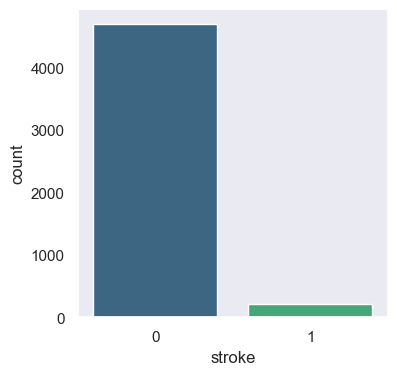

In [13]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'stroke', data = data_clean, palette = 'viridis')
plt.show()

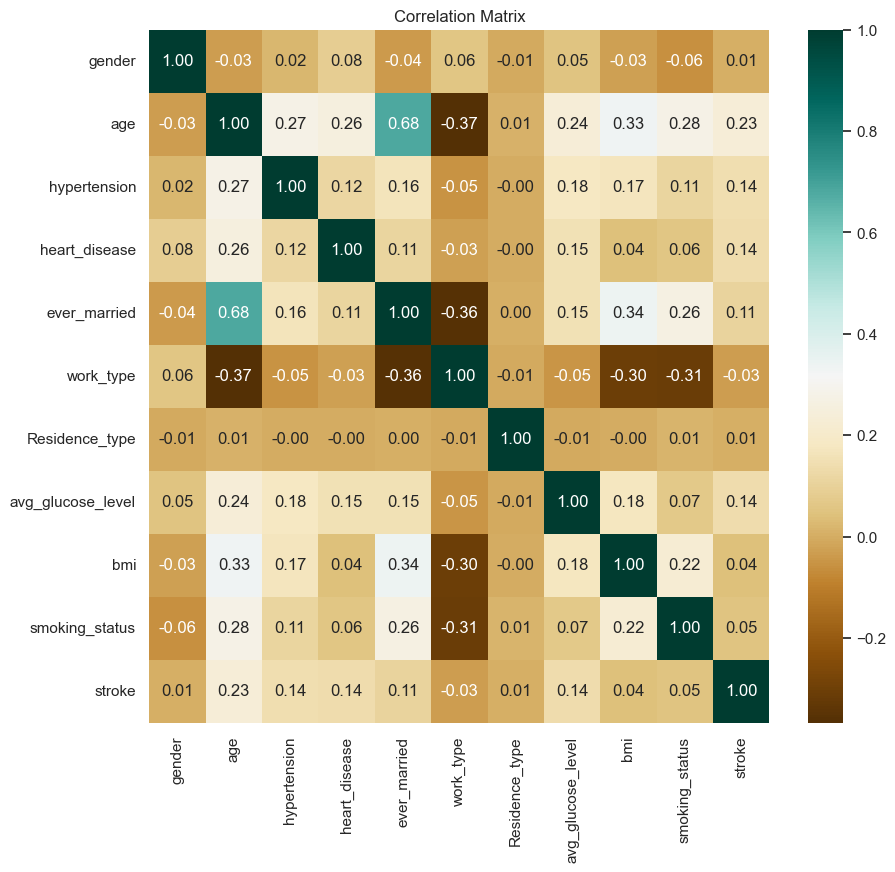

In [14]:
# Correlation Matrix
corr_matrix = data_clean.corr()
plt.figure(figsize = (10,9))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'BrBG', annot = True)
plt.title("Correlation Matrix")
plt.show()

## Training dataset and Normalization:

In [15]:
# model training and normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X = data_clean.iloc[:, : -1]
y = data_clean.iloc[:, -1 :]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

# Now use RandomOverSampler from imblearn library for imbalanced class stroke
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

## Modeling: 
In this part focus would be tilted toward model building for Logistic, SVM, KNN, and Decision Tree. So we will use GridSearchCV for hypertuning and then we will focus on model evaluation with some measurements. After all this process we will have our good fit model which provides that model is good fit for the stroke prediction.

### Functions for model comparisions:

In [16]:
# import sklearn metrics library
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

# For calculating scoring of model prediction
def evaluate_model(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt,yp)
    precision, recall, fbeta,_ = precision_recall_fscore_support(yt, yp, average = 'weighted')
    results_pos['precision'] = precision
    results_pos['recall'] = recall
    results_pos['f1score'] = fbeta
    
    #return results_pos
    metrics = list(results_pos.keys())
    values = list(results_pos.values())
    
    ax = sns.barplot(x=metrics, y=values, palette='BrBG')
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Value')
    plt.ylim(0, 1)  # Setting y-axis limit for better visualization
    
    for i, v in enumerate(values):
        ax.text(i, v/2, f'{v:.2f}', ha='center', va='center', color='white', fontsize=12)
    
    plt.show()
    
    # Classification report for model prediction
def class_report(yt, yp):
    class_report_df = pd.DataFrame(classification_report(yt, yp, output_dict= True)).transpose()
    return class_report_df.style.background_gradient(cmap = 'BrBG',axis = 0)

# Confusion Matrix for model prediction

def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(cm, fmt='d', annot =  True, cmap = 'BrBG')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')
    plt.show()

### Logistic Regression model:

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Grid Search for Logistic Regression
params_grid = {
    'penalty': ['l1', 'l2'],
    'C' : [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'solver' : ['liblinear', 'sag', 'newton_cg', 'lbfgs']
}
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)

grid_search = GridSearchCV(estimator = log_reg, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())

best_params = grid_search.best_params_
best_params

{'C': 0.6, 'penalty': 'l1', 'solver': 'liblinear'}

In [18]:
# Logistic Regression with optimal parameters (after hypertuning)
log_reg = LogisticRegression(max_iter = 1000, random_state = 42,
                            C = 0.6, penalty = 'l1', solver = 'liblinear', class_weight='balanced')

log_reg.fit(X_train_resampled, y_train_resampled.values.ravel())

y_pred = log_reg.predict(X_test)

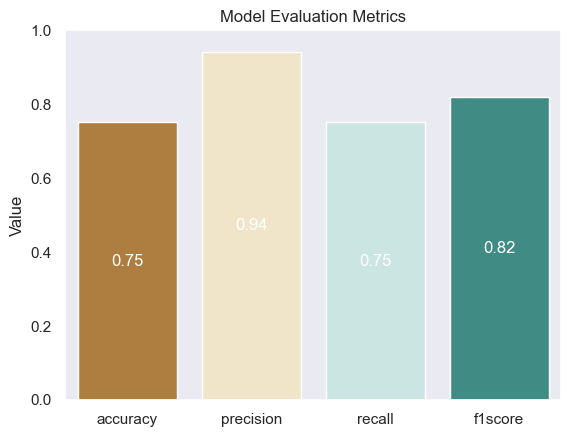

In [14]:
# Model Evaluation report
evaluate_model(y_test, y_pred)

In [19]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.987179,0.745963,0.849785,929.000000
1,0.157143,0.830189,0.264264,53.000000
accuracy,0.750509,0.750509,0.750509,0.750509
macro avg,0.572161,0.788076,0.557025,982.000000
weighted avg,0.942381,0.750509,0.818184,982.000000


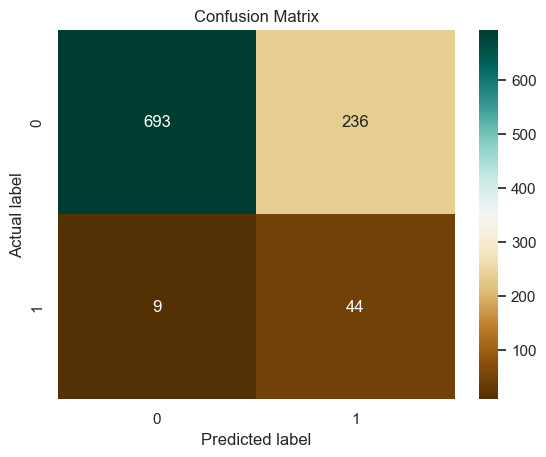

In [18]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

### KNN Algorithm:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params_grid = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'metric' : ['minkowski', 'euclidean', 'manhattan'],
    'weights' : ['distance', 'uniform']
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator =knn, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())

best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [21]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', weights = 'distance')
knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test)

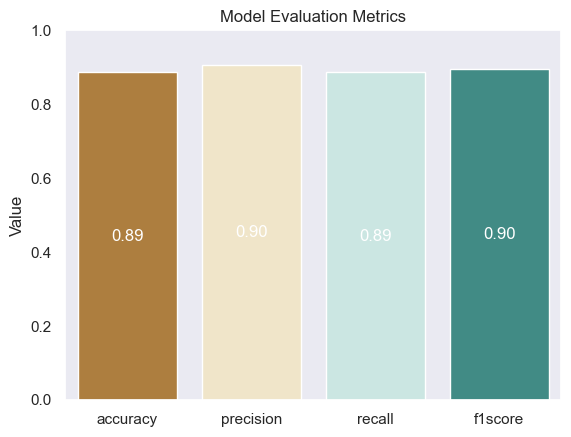

In [22]:
# Model Evaluation report
evaluate_model(y_test, y_pred)

In [23]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.950386,0.927879,0.938998,929.000000
1,0.106667,0.150943,0.125000,53.000000
accuracy,0.885947,0.885947,0.885947,0.885947
macro avg,0.528526,0.539411,0.531999,982.000000
weighted avg,0.904849,0.885947,0.895065,982.000000


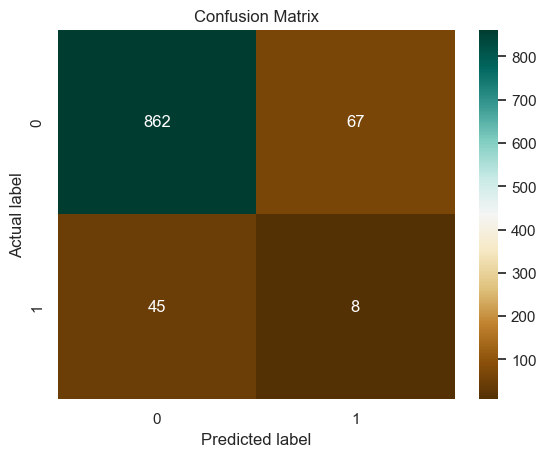

In [24]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

### SVM Algorithm:

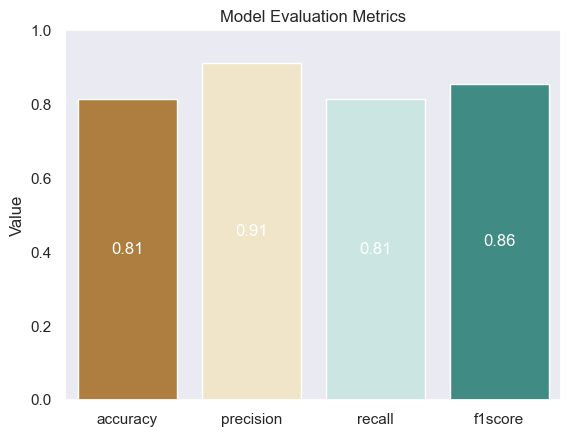

In [25]:
from sklearn.svm import SVC

svm  = SVC(C = 10, kernel = 'rbf', class_weight = 'balanced')
svm.fit(X_train_resampled, y_train_resampled.values.ravel())

y_pred = svm.predict(X_test)

evaluate_model(y_test, y_pred)

In [26]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.957055,0.839612,0.894495,929.000000
1,0.107784,0.339623,0.163636,53.000000
accuracy,0.812627,0.812627,0.812627,0.812627
macro avg,0.532420,0.589618,0.529066,982.000000
weighted avg,0.911219,0.812627,0.855050,982.000000


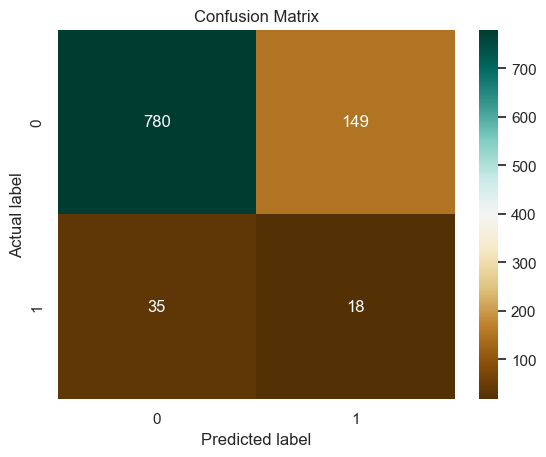

In [27]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

### Decision Tree Algorithm:

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())
best_params = grid_search.best_params_
best_params

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

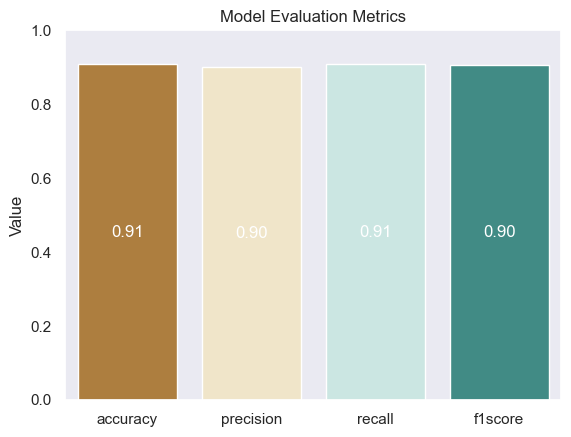

In [29]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=1, random_state=42)
dt.fit(X_train_resampled, y_train_resampled.values.ravel())

y_pred = dt.predict(X_test)

evaluate_model(y_test, y_pred)

In [30]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.947705,0.955867,0.951768,929.000000
1,0.088889,0.075472,0.081633,53.000000
accuracy,0.908350,0.908350,0.908350,0.908350
macro avg,0.518297,0.515669,0.516701,982.000000
weighted avg,0.901354,0.908350,0.904806,982.000000


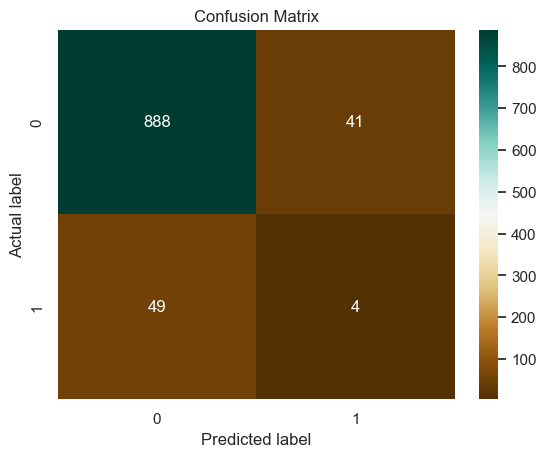

In [31]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

### Conclusion:
According to evaluation metrics we have seen that KNN Algorithm has been good fit model with good accuracy score and recall score and also it has less errors than other algorithms as shown in confusion matrix.

### Future Scope: 
It is true that these models have highest bias and variance which can only be reduced if using ensamble learning.
So following models might be good fit to it:
- Random Forest
- Adaboost
- XGBOOST
These models are capable of reducing bias and variance that we find in above models.